# 2. 넘파이처럼 텐서플로 사용하기

### 2.1 텐서와 연산

- 더하기 : tf.add()
- 곱하기 : tf.multiply()
- tf.quare(), tf.exp(), tf.sqrt(), tf.reshape(), tf.squeeze(), tf.tile(), tf.reduce_mean(), tf.reduce_sum(), tf.reduce_max(), 
- tf.math.log()
- tf.transpose()

In [2]:

import tensorflow as tf

tf.constant([[1.,2.,3.],[4.,5.,6.]]) # 행렬

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42) # 스칼라

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
t = tf.constant([[1.,2.,3.],[4.,5.,6.]]) 
t.shape  # shape

TensorShape([2, 3])

In [5]:
t.dtype # 타입 확인

tf.float32

In [6]:
# 인덱스 참조, 넘파이와 매우 비슷함
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
# tf.add(t, 10) 과 같음

t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [8]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [9]:
# 곱셈

t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### 2.2 텐서와 넘파이
- 넘파이 배열에 텐서플로 연산을 적용할 수 있고 텐서에 넘파이 연산을 적용할 수도 있음

In [10]:
import numpy as np

a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [11]:
tf.square(a) # 텐서 제곱

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [12]:
np.square(t) #  넘파이 제곱

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### 2.3 타입 변환
- 타입 변환은 성능을 크게 감소시킬 수 있음
- 텐서플로는 어떤 타입 변환도 자동으로 수행하지 않음
- 32비트 실수와 64비트 실수도 더할 수 없음

In [14]:

tf.constant(2.) + tf.constant(40) # 에러 

tf.constant(2.) + tf.constant(40., dtype=tf.float64) # 에러

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]

In [15]:
# 타입 변환 (tf.cast())

t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### 2.4 변수
- tf.Tensor는 변경이 불가능한 객체, 즉 텐서의 내용을 바굴수 없음!
- tf.Variable은 tf.Tensor와 비슷하게 동작

In [16]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [17]:
# v값에 2 곱하기

v.assign(2 * v) 

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [18]:
# v의 0행 1열 값을 42로 바꾸기

v[0, 1].assign(42) 

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [20]:
# v의 3행값을 0, 1로 바꾸기

v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [21]:
#  0행 0열을 100으로 1행 2열을 200으로 업데이트

v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

# 3. 사용자 저의 모델과 훈련 알고리즘

### 3.1 사용자 정의 손실 함수

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [26]:
# keras.losses.Huber로 불러 사용할 수도 있음
# Huber() 구현해보기

def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)



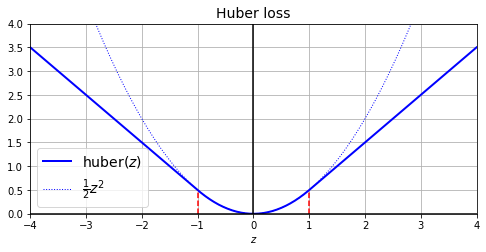

In [27]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [29]:
import keras

input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [30]:
# huber_fn 손실함수를 호출하여 손실을 계산하고 이를 사용해 경사하강법을 수행

model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [31]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.6092 - mae: 0.9705 - val_loss: 0.2032 - val_mae: 0.4914
Epoch 2/2
363/363 [==============================] - 0s 989us/step - loss: 0.2032 - mae: 0.4951 - val_loss: 0.1961 - val_mae: 0.4840


### 3.2 사용자 정의 요소를 가진 모델을 저장하고 로드하기

In [32]:
# 모델 저장

model.save("my_model_with_a_custom_loss.h5")

In [33]:
# 저장 모델 불러오기
# 사용자 정의 객체를 포함한 모델을 로드할 때는 그 이름과 객체를 매핑해야 한다.

model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})

In [34]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1967 - mae: 0.4860 - val_loss: 0.1854 - val_mae: 0.4643
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1928 - mae: 0.4793 - val_loss: 0.1844 - val_mae: 0.4655


---
모델을 저장 할 때 이 threshold 값은 저장되지 않는다. 따라서 모델을 로드할 때 threshold 값을 지정해야 함

In [36]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [37]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2133 - mae: 0.4791 - val_loss: 0.2207 - val_mae: 0.4729
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2090 - mae: 0.4740 - val_loss: 0.2163 - val_mae: 0.4676


In [38]:
# 모델 저장

model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [39]:
# 저장 모델 불러오기

model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [40]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2071 - mae: 0.4710 - val_loss: 0.1956 - val_mae: 0.4571
Epoch 2/2
363/363 [==============================] - 0s 988us/step - loss: 0.2030 - mae: 0.4670 - val_loss: 0.1994 - val_mae: 0.4564


--- 
keras.losses.Loss 클래스를 상속하고 get_config() 메서드를 구현하여 해결

In [41]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, thresho=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
        
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold":self.threshold}

SyntaxError: unexpected EOF while parsing (<ipython-input-41-8b207160f364>, line 13)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [ ]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

In [ ]:
# 모델 저장

model.save("my_model_with_a_custom_loss_class.h5")

In [ ]:
# 저장 모델 불러오기

model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})

In [ ]:
# 모델 학습

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

In [ ]:
# threshold 확인

model.loss.threshold

### 3.3 활성화 함수, 초기화 규제, 제한을 커스터마이징하기

In [ ]:
def my_softplus(z): # tf.nn.softplus(z) 와 반화값이 같음
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # tf.nn.relu(weights) 와 반환값이 같음
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [ ]:
# 커스터마이징 함수 사용하여 모델 층 만들기

layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [ ]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

In [ ]:
model.save("my_model_with_many_custom_parts.h5")

### 3.4 사용자 정의 지표

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [43]:
# 앞서 만든 손실함수는 지표로도 사용해도 잘 작동됨

model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [44]:
# 모델 훈련

model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 740us/step - loss: 1.9647 - huber_fn: 0.8571
Epoch 2/2
363/363 [==============================] - 0s 787us/step - loss: 0.5333 - huber_fn: 0.2500


In [45]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 1s 791us/step - loss: 0.1136 - huber_fn: 0.2290
Epoch 2/2
363/363 [==============================] - 0s 824us/step - loss: 0.1096 - huber_fn: 0.2194


In [46]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()


(0.11362071335315704, 0.11467370408753212)

Streaming metrics (스트리밍 지표 or 상태가 있는 지표)

In [47]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [48]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [49]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [50]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [51]:
# 변수 초기화

precision.reset_states()